In [146]:
import pandas as pd

In [147]:
data=pd.read_excel("dataset1.xlsx")

In [148]:
data.head()

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,Customer_follower
0,Cheaters,ambajirao_a,Bangalore India,1,2014-04-22 17:22:00,9558 Views,Third class service and they are cheaters. Nev...,2 Reviews,1 Follower
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,2006-03-13 21:41:00,3548 Views,Its true that insurance is a services based in...,7 Reviews,6 Followers
2,Metlife is the worst insurance company,lijok,Kochi India,1,2013-06-04 09:08:00,9311 Views,I have taken a Metlife policy in 2008 August w...,1 Review,NaN
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,2004-10-14 14:06:00,15309 Views,Scene 1 : A lady weeping besides the dead body...,15 Reviews,28 Followers
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,2017-05-31 19:30:00,3480 Views,"Once policy created, no one look back to cust...",1 Review,NaN


In [149]:
data.shape

(130, 9)

In [150]:
data.isnull().sum()

subject                       0
Customer                      2
Location                      5
Rating                        0
date_time                     0
Views                         0
complaint                     0
Total_reviews_by_customer     2
Customer_follower            88
dtype: int64

In [151]:
data = data.drop(labels = "Customer_follower", axis = 1)


In [152]:
data.shape

(130, 8)

In [153]:
data=data.dropna()

In [154]:
data.Location.unique()    #data's very dirty

array(['Bangalore India', 'new delhi india', 'Kochi India',
       'mumbai india', 'Bengaluru/ Bangalore India', 'Chennai India',
       'Dwarka India', 'banglaore india', 'Delhi India',
       'Chandigarh India', 'Bangalore Inida', 'New Delhi, India India',
       'Miamisburg OH India', 'India', 'Bangalore BE', 'noida India',
       'Hyderabad India', 'Rani Bagh India', 'Mumbai India',
       'greater noida India', 'Mumbai, India India', 'Jamshedpur India',
       'New Delhi India', 'Mumbai, Maharashtra, India India',
       'ludhiana India', 'Rohtak India', 'Pune India', 'Gurgaon India',
       'Kolkata India', 'Noida, India India', 'BHOPAL India',
       'Amherst USA', 'Karnataka India', 'chennai India',
       'Bangalore, India India', 'kolkata India', 'Rishikesh India',
       'Noida India', 'Lucknow India', 'bangalore India',
       'Mangalore India', 'Allahabad, India India', 'Kottayam India',
       'Ajmer India', 'gurgaon India', 'thane India', 'Bhadra India',
       'Ahmedaba

In [155]:
data.Total_reviews_by_customer.unique()

array(['2 Reviews', '7 Reviews', '1 Review', '15 Reviews', '198 Reviews',
       '3 Reviews', '6 Reviews', '5 Reviews', '60 Reviews', '4 Reviews',
       '30 Reviews', '110 Reviews', '90 Reviews', '23 Reviews',
       '54 Reviews', '21 Reviews', '14 Reviews', '237 Reviews',
       '50 Reviews', '9 Reviews', '31 Reviews', '19 Reviews',
       '358 Reviews', '440 Reviews', '16 Reviews', '18 Reviews',
       '66 Reviews'], dtype=object)

In [156]:
import nltk
nltk.corpus.stopwords.words('english')
stop_words=nltk.corpus.stopwords.words('english')
junk_words=["amp",'rt','https','will']
len(stop_words)
stop_words.extend(junk_words)
len(stop_words)

183

In [157]:
docs=data['subject'].str.lower()
docs.head()
docs=docs.str.replace('[^a-z #@]','') # retain all alphabets with #@
docs.head()

0                                            cheaters
1                                    well think again
2              metlife is the worst insurance company
3                               have u met life today
4    irresponsible persons  working over there in pnb
Name: subject, dtype: object

In [158]:
#removing ing, ed etc
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

docs_clean=docs.apply(lambda v: clean_text(v))

In [159]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

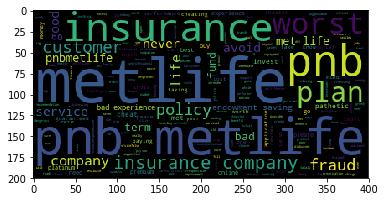

In [160]:
wc=WordCloud().generate(' '.join(docs))
plt.imshow(wc)

In [161]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\sreekar
[nltk_data]     chidurala\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [162]:
#!pip install twython

In [163]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [164]:
senti=SentimentIntensityAnalyzer()

In [165]:
def get_sentiment_score(review):
    compound_score=senti.polarity_scores(review)['compound']
    return compound_score
def get_sentiment(score):
    if score>0.25:
        return 'Positive'
    elif score <-.25:
        return "negitive"
    else:
        return 'Neutral'

In [166]:
def get_sentiment(score):
    if score>0.25:
        return 'Positive'
    elif score <-.25:
        return "negitive"
    else:
        return "neutral"

get_sentiment(.26)

'Positive'

In [167]:
data.dtypes

subject                              object
Customer                             object
Location                             object
Rating                                int64
date_time                    datetime64[ns]
Views                                object
complaint                            object
Total_reviews_by_customer            object
dtype: object

In [168]:
data.dtypes

subject                              object
Customer                             object
Location                             object
Rating                                int64
date_time                    datetime64[ns]
Views                                object
complaint                            object
Total_reviews_by_customer            object
dtype: object

In [169]:
data['sentiment_score']=data["subject"].apply(get_sentiment_score)


In [170]:
data.dtypes

subject                              object
Customer                             object
Location                             object
Rating                                int64
date_time                    datetime64[ns]
Views                                object
complaint                            object
Total_reviews_by_customer            object
sentiment_score                     float64
dtype: object

In [171]:
data["sentiment_vader"]=data["sentiment_score"].apply(get_sentiment)

In [172]:
data.head()

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,sentiment_score,sentiment_vader
0,Cheaters,ambajirao_a,Bangalore India,1,2014-04-22 17:22:00,9558 Views,Third class service and they are cheaters. Nev...,2 Reviews,-0.4404,negitive
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,2006-03-13 21:41:00,3548 Views,Its true that insurance is a services based in...,7 Reviews,0.5053,Positive
2,Metlife is the worst insurance company,lijok,Kochi India,1,2013-06-04 09:08:00,9311 Views,I have taken a Metlife policy in 2008 August w...,1 Review,-0.6249,negitive
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,2004-10-14 14:06:00,15309 Views,Scene 1 : A lady weeping besides the dead body...,15 Reviews,0.0000,neutral
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,2017-05-31 19:30:00,3480 Views,"Once policy created, no one look back to cust...",1 Review,-0.4404,negitive


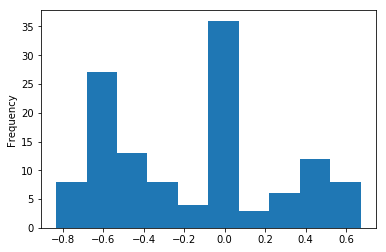

In [173]:
data["sentiment_score"].plot.hist()

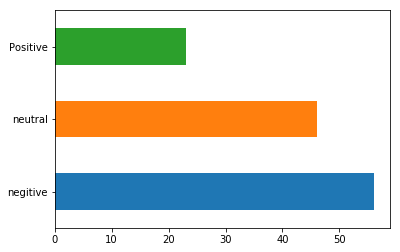

In [174]:
data['sentiment_vader'].value_counts().plot.barh()

In [175]:
#negitive reviews

In [176]:
#ratings

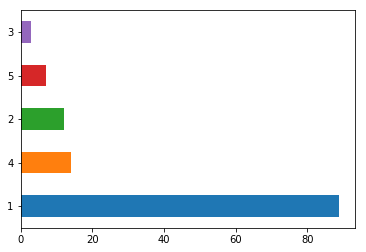

In [177]:
data['Rating'].value_counts().plot.barh()

In [178]:
#it says that all the customers are not satisfied with products

In [179]:
#word cloud on complaints

In [180]:
docs=data['complaint'].str.lower()
docs.head()
docs=docs.str.replace('[^a-z #@]','') # retain all alphabets with #@
docs.head()

0    third class service and they are cheaters neve...
1    its true that insurance is a services based in...
2    i have taken a metlife policy in  august when ...
3    scene   a lady weeping besides the dead body o...
4    once policy created no one look back  to custo...
Name: complaint, dtype: object

In [181]:
stemmer=nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words=row_text.split(' ')
    #print(row_words)
    row_words= [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('----')
    return ' '.join(row_words)

docs_clean=docs.apply(lambda v: clean_text(v))

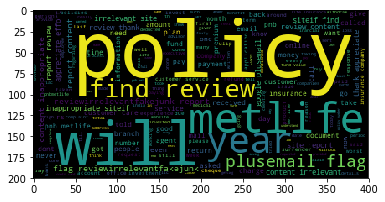

In [182]:
wc=WordCloud().generate(' '.join(docs))
plt.imshow(wc)

In [183]:
data.Location.unique()

array(['Bangalore India', 'new delhi india', 'Kochi India',
       'mumbai india', 'Bengaluru/ Bangalore India', 'Chennai India',
       'Dwarka India', 'banglaore india', 'Delhi India',
       'Chandigarh India', 'Bangalore Inida', 'New Delhi, India India',
       'Miamisburg OH India', 'India', 'Bangalore BE', 'noida India',
       'Hyderabad India', 'Rani Bagh India', 'Mumbai India',
       'greater noida India', 'Mumbai, India India', 'Jamshedpur India',
       'New Delhi India', 'Mumbai, Maharashtra, India India',
       'ludhiana India', 'Rohtak India', 'Pune India', 'Gurgaon India',
       'Kolkata India', 'Noida, India India', 'BHOPAL India',
       'Amherst USA', 'Karnataka India', 'chennai India',
       'Bangalore, India India', 'kolkata India', 'Rishikesh India',
       'Noida India', 'Lucknow India', 'bangalore India',
       'Mangalore India', 'Allahabad, India India', 'Kottayam India',
       'Ajmer India', 'gurgaon India', 'thane India', 'Bhadra India',
       'Ahmedaba

In [199]:
city=data['Location'].str.lower()
city=city.str.replace('[^a-z#@]','')
#city=city.str.replace('[india]','')
city.unique()


array(['bangaloreindia', 'newdelhiindia', 'kochiindia', 'mumbaiindia',
       'bengalurubangaloreindia', 'chennaiindia', 'dwarkaindia',
       'banglaoreindia', 'delhiindia', 'chandigarhindia',
       'bangaloreinida', 'newdelhiindiaindia', 'miamisburgohindia',
       'india', 'bangalorebe', 'noidaindia', 'hyderabadindia',
       'ranibaghindia', 'greaternoidaindia', 'mumbaiindiaindia',
       'jamshedpurindia', 'mumbaimaharashtraindiaindia', 'ludhianaindia',
       'rohtakindia', 'puneindia', 'gurgaonindia', 'kolkataindia',
       'noidaindiaindia', 'bhopalindia', 'amherstusa', 'karnatakaindia',
       'bangaloreindiaindia', 'rishikeshindia', 'lucknowindia',
       'mangaloreindia', 'allahabadindiaindia', 'kottayamindia',
       'ajmerindia', 'thaneindia', 'bhadraindia', 'ahmedabadindia',
       'faridabadindia', 'delindia', 'kharagpurindia', 'hubliindia',
       'salemindia', 'vijayawadaindia', 'jaipurindia',
       'coimbatoretamilnaduindia', 'morindaindia', 'trichyindia',
       'c

In [190]:
#delete=[' india']

In [191]:
#city= [word for word in city if word not in delete]

In [192]:
#len(city)

125

In [200]:
data["clean_location"]=city

In [201]:
data["clean_location"].unique()

array(['bangaloreindia', 'newdelhiindia', 'kochiindia', 'mumbaiindia',
       'bengalurubangaloreindia', 'chennaiindia', 'dwarkaindia',
       'banglaoreindia', 'delhiindia', 'chandigarhindia',
       'bangaloreinida', 'newdelhiindiaindia', 'miamisburgohindia',
       'india', 'bangalorebe', 'noidaindia', 'hyderabadindia',
       'ranibaghindia', 'greaternoidaindia', 'mumbaiindiaindia',
       'jamshedpurindia', 'mumbaimaharashtraindiaindia', 'ludhianaindia',
       'rohtakindia', 'puneindia', 'gurgaonindia', 'kolkataindia',
       'noidaindiaindia', 'bhopalindia', 'amherstusa', 'karnatakaindia',
       'bangaloreindiaindia', 'rishikeshindia', 'lucknowindia',
       'mangaloreindia', 'allahabadindiaindia', 'kottayamindia',
       'ajmerindia', 'thaneindia', 'bhadraindia', 'ahmedabadindia',
       'faridabadindia', 'delindia', 'kharagpurindia', 'hubliindia',
       'salemindia', 'vijayawadaindia', 'jaipurindia',
       'coimbatoretamilnaduindia', 'morindaindia', 'trichyindia',
       'c

In [204]:
def getname(name):
    title_group = {'bangaloreindia':'Banglore','newdelhiindia':"Delhi",'kochiindia':"Kochi", 'mumbaiindia':'Mumbai',
       'bengalurubangaloreindia':"Baanglore", 'chennaiindia':"Chennai", 'dwarkaindia':"Dwaraka",
       'banglaoreindia':"Banglore", 'delhiindia':"Delhi", 'chandigarhindia':"Chandigarh",
       'bangaloreinida':"Banglore", 'newdelhiindiaindia':"Delhi", 'miamisburgohindia':"Miamisburgoh",
       'india':"India", 'bangalorebe':"Banglore", 'noidaindia':"Noida", 'hyderabadindia':"Hyderabad",
       'ranibaghindia':"Ranibagh", 'greaternoidaindia':"Noida", 'mumbaiindiaindia':"Mumbai",
       'jamshedpurindia':"Jamshedpur", 'mumbaimaharashtraindiaindia':"Mumbai", 'ludhianaindia':"Ludhiana",
       'rohtakindia':"Rohtak", 'puneindia':"Pune", 'gurgaonindia':"Gurgaon", 'kolkataindia':"Kolkatha",
       'noidaindiaindia':"Noida", 'bhopalindia':"Bhopal", 'amherstusa':"AMhertusa", 'karnatakaindia':"Banglore",
       'bangaloreindiaindia':"Banglore", 'rishikeshindia':"Rishikesh", 'lucknowindia':"Lucknow",
       'mangaloreindia':"Manglore", 'allahabadindiaindia':"Allahabad", 'kottayamindia':"Kottayam",
       'ajmerindia':"Ajmer", 'thaneindia':"Thane", 'bhadraindia':"Bhadra", 'ahmedabadindia':"Ahmedabad",
       'faridabadindia':"Faridabad", 'delindia':"Delhi", 'kharagpurindia':"Kharagpur", 'hubliindia':"Hubli",
       'salemindia':"Salem", 'vijayawadaindia':"Vijaywada", 'jaipurindia':"Jaipur",
       'coimbatoretamilnaduindia':"Coimbatore", 'morindaindia':"India", 'trichyindia':"Trichy",
       'cochinindia':"Cochin", 'jaipurrajasthanindia':"Jaipur", 'tezpurindia':"Tezpur"}  
    return title_group[name]
data['clean_location']=data.clean_location.map(lambda x : getname(x))

In [206]:
data.clean_location.unique()

array(['Banglore', 'Delhi', 'Kochi', 'Mumbai', 'Baanglore', 'Chennai',
       'Dwaraka', 'Chandigarh', 'Miamisburgoh', 'India', 'Noida',
       'Hyderabad', 'Ranibagh', 'Jamshedpur', 'Ludhiana', 'Rohtak',
       'Pune', 'Gurgaon', 'Kolkatha', 'Bhopal', 'AMhertusa', 'Rishikesh',
       'Lucknow', 'Manglore', 'Allahabad', 'Kottayam', 'Ajmer', 'Thane',
       'Bhadra', 'Ahmedabad', 'Faridabad', 'Kharagpur', 'Hubli', 'Salem',
       'Vijaywada', 'Jaipur', 'Coimbatore', 'Trichy', 'Cochin', 'Tezpur'],
      dtype=object)

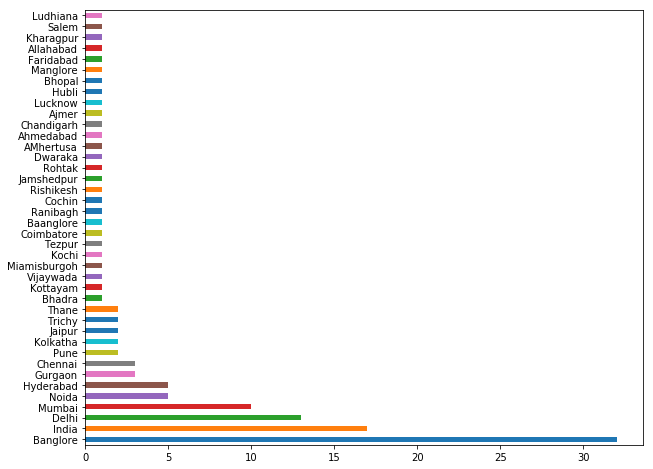

In [221]:
plt.figure(figsize=(10,8))
data['clean_location'].value_counts().plot.barh()

In [ ]:
##Banglore has large no. of customers

In [209]:
data.head()

,subject,Customer,Location,Rating,date_time,Views,complaint,Total_reviews_by_customer,sentiment_score,sentiment_vader,clean_location
0,Cheaters,ambajirao_a,Bangalore India,1,2014-04-22 17:22:00,9558 Views,Third class service and they are cheaters. Nev...,2 Reviews,-0.4404,negitive,Banglore
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,2006-03-13 21:41:00,3548 Views,Its true that insurance is a services based in...,7 Reviews,0.5053,Positive,Delhi
2,Metlife is the worst insurance company,lijok,Kochi India,1,2013-06-04 09:08:00,9311 Views,I have taken a Metlife policy in 2008 August w...,1 Review,-0.6249,negitive,Kochi
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,2004-10-14 14:06:00,15309 Views,Scene 1 : A lady weeping besides the dead body...,15 Reviews,0.0000,neutral,Mumbai
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,2017-05-31 19:30:00,3480 Views,"Once policy created, no one look back to cust...",1 Review,-0.4404,negitive,Baanglore


<Figure size 1440x1584 with 0 Axes>

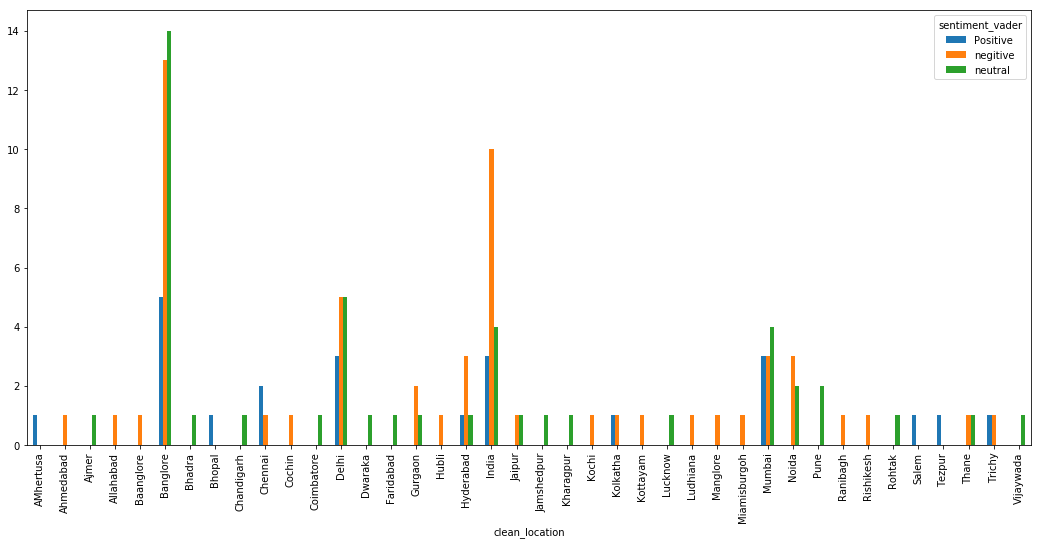

In [230]:
plt.figure(figsize=(20,22))
pd.crosstab(data.clean_location,data.sentiment_vader).plot(kind='bar',figsize=(18,8));

In [222]:
pd.crosstab(data.clean_location,data.sentiment_vader)

sentiment_vader,Positive,negitive,neutral
clean_location,,,
AMhertusa,1,0,0
Ahmedabad,0,1,0
Ajmer,0,0,1
Allahabad,0,1,0
Baanglore,0,1,0
Banglore,5,13,14
Bhadra,0,0,1
Bhopal,1,0,0
Chandigarh,0,0,1
